# Problem Set 6, Biomechanical Data
## Part B. Running Analysis

Using the gait data provided: 

1.	Calculate the average joint angles for the hip, knee, and ankle during stance phase.

2.	Plot the average joint angle time series data.  

3.	Calculate the average vertical GRF (y-axis). 

4.	Plot the vertical GRFs time series data. 


## Import libraries and set directory

In [1]:
# Helper Code

import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get the current working directory
current_directory = os.getcwd()

# Set path to the "Running_data" folder
data_folder_path = os.path.join(current_directory, "Running_data")

# Get list of files with "*.txt" extension in the "Running_data" folder
pathstring = os.path.join(data_folder_path, "*.txt")
flist = glob.glob(pathstring)

# Create an empty DataFrame to store the data
all_data = pd.DataFrame()

# Import data from text files
for file in flist:
    # Read txt data from file, tab separated
    sheet = pd.read_csv(file, delimiter='\t')
    
    # Append the data horizontally to the main DataFrame
    all_data = pd.concat([all_data, sheet], axis=1)

# Get unique names in row 0 and row 3
unique_names_row_0 = all_data.loc[0].unique()
unique_names_row_3 = all_data.loc[3].unique()

print("Unique names in row 0:", unique_names_row_0)
print("Unique names in row 3:", unique_names_row_3)

# END Helper Code
# -----------------------------------

Unique names in row 0: [nan 'LANK_Angle' 'LGRF' 'LHIP_Angle' 'LKNEE_Angle']
Unique names in row 3: ['ITEM' 'X' 'Y' 'Z']


In [2]:
# Check the dataframe loaded correctly, should be size (105, 484)
all_data


,Unnamed: 0,RBDS04runT25.c3d,RBDS04runT25.c3d.1,RBDS04runT25.c3d.2,RBDS04runT25.c3d.3,RBDS04runT25.c3d.4,RBDS04runT25.c3d.5,RBDS04runT25.c3d.6,RBDS04runT25.c3d.7,RBDS04runT25.c3d.8,...,RBDS04runT25.c3d.110,RBDS04runT25.c3d.111,RBDS04runT25.c3d.112,RBDS04runT25.c3d.113,RBDS04runT25.c3d.114,RBDS04runT25.c3d.115,RBDS04runT25.c3d.116,RBDS04runT25.c3d.117,RBDS04runT25.c3d.118,RBDS04runT25.c3d.119
0,NaN,LANK_Angle,LANK_Angle,LANK_Angle,LANK_Angle,LANK_Angle,LANK_Angle,LANK_Angle,LANK_Angle,LANK_Angle,...,LKNEE_Angle,LKNEE_Angle,LKNEE_Angle,LKNEE_Angle,LKNEE_Angle,LKNEE_Angle,LKNEE_Angle,LKNEE_Angle,LKNEE_Angle,LKNEE_Angle
1,NaN,LINK_MODEL_BASED,LINK_MODEL_BASED,LINK_MODEL_BASED,LINK_MODEL_BASED,LINK_MODEL_BASED,LINK_MODEL_BASED,LINK_MODEL_BASED,LINK_MODEL_BASED,LINK_MODEL_BASED,...,LINK_MODEL_BASED,LINK_MODEL_BASED,LINK_MODEL_BASED,LINK_MODEL_BASED,LINK_MODEL_BASED,LINK_MODEL_BASED,LINK_MODEL_BASED,LINK_MODEL_BASED,LINK_MODEL_BASED,LINK_MODEL_BASED
2,NaN,ORIGINAL,ORIGINAL,ORIGINAL,ORIGINAL,ORIGINAL,ORIGINAL,ORIGINAL,ORIGINAL,ORIGINAL,...,ORIGINAL,ORIGINAL,ORIGINAL,ORIGINAL,ORIGINAL,ORIGINAL,ORIGINAL,ORIGINAL,ORIGINAL,ORIGINAL
3,ITEM,X,Y,Z,X,Y,Z,X,Y,Z,...,Z,X,Y,Z,X,Y,Z,X,Y,Z
4,1,6.139717,13.068245,1.391065,6.208804,13.955550,1.658200,3.892546,14.039752,2.848131,...,9.179946,1.018622,-13.722648,6.864394,0.901170,-12.252662,7.534416,0.970451,-13.177325,7.169177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,97,-0.479415,14.471528,-9.432041,-1.356987,14.806130,-9.950337,0.020607,15.934099,-9.928399,...,16.751114,-0.703725,-11.108199,16.972153,-0.570516,-10.996435,16.370495,-0.653318,-10.855362,17.078045
101,98,-0.677621,14.636444,-10.565183,-1.583624,14.910816,-11.028459,-0.195158,16.003807,-11.106623,...,16.568836,-0.808249,-11.093083,16.723877,-0.657874,-10.968722,16.192488,-0.777281,-10.798873,16.953152
102,99,-0.871802,14.778179,-11.668667,-1.800194,14.988405,-12.078770,-0.402547,16.035822,-12.245357,...,16.423845,-0.914366,-11.066744,16.512409,-0.743320,-10.942456,16.046553,-0.906408,-10.741067,16.864489
103,100,-1.059399,14.899006,-12.740777,-2.003137,15.040348,-13.100964,-0.597855,16.032518,-13.343470,...,16.318581,-1.021520,-11.033015,16.340832,-0.826275,-10.921703,15.934409,-1.039868,-10.686900,16.813683


## Using the gait data provided: 

1.	Calculate the average joint angles for the hip, knee, and ankle during stance phase.

2.	Plot the time series data, similar to figure below.  

3.	Calculate the average vertical GRF (y-axis). 

4.	Plot the vertical GRFs time series data. 


## Calcuating Average Joint Angles

In [3]:
# Function for averaging signal components
def mean_signal(x, axis=1):
    """averages signal components. (Ex: Each component is a trial.)
    Assumes axis is an int. Gets signal shape and averages across rows (1) or cols (0)
    Returns the average array, or errors if the axis is set wrong
    
    x = input array of data (2D)
    axis = tells function to calculate across rows (axis = 1, or columns (axis = 0) )"""
    le, num = x.shape  # length and number of components of signal

    if axis == 1:
        # get the average signal
        mean = x.sum(axis=axis) / num
        return mean
    elif axis == 0:
        # get the average signal
        mean = x.sum(axis=axis) / le
        return mean
    else:
        raise ValueError


# Calculate average signals and store in a List
average_signals = []
for file in flist:
    # read txt data from file, skips first 4 rows, set first column as index
    df = pd.read_csv(file, delimiter='\t', skiprows=[0, 1, 2, 3], index_col=0)
    data = df.values
    # get mean signals (x: ant/post, y: vertical, z: medial/lateral)
    ave = {'x': mean_signal(data[:, ::3]), 'y': mean_signal(data[:, 1::3]), 'z': mean_signal(data[:, 2::3])}
    
    # remove file extension from the file name
    file_name = os.path.splitext(os.path.basename(file))[0]
    # store data
    average_signals.append({'File': file_name, 'X': ave['x'], 'Y': ave['y'], 'Z': ave['z']})

# Create DataFrame from average_signals
average_df = pd.DataFrame(average_signals)

# Separate the kinematics from the GRF data (in order of Hip, Knee, Ankle)
kinematics = average_df.iloc[[2,3,0], :]
GRF = average_df.iloc[[1], :]

In [ ]:
average_df

In [ ]:
kinematics

## Plot Kinematics

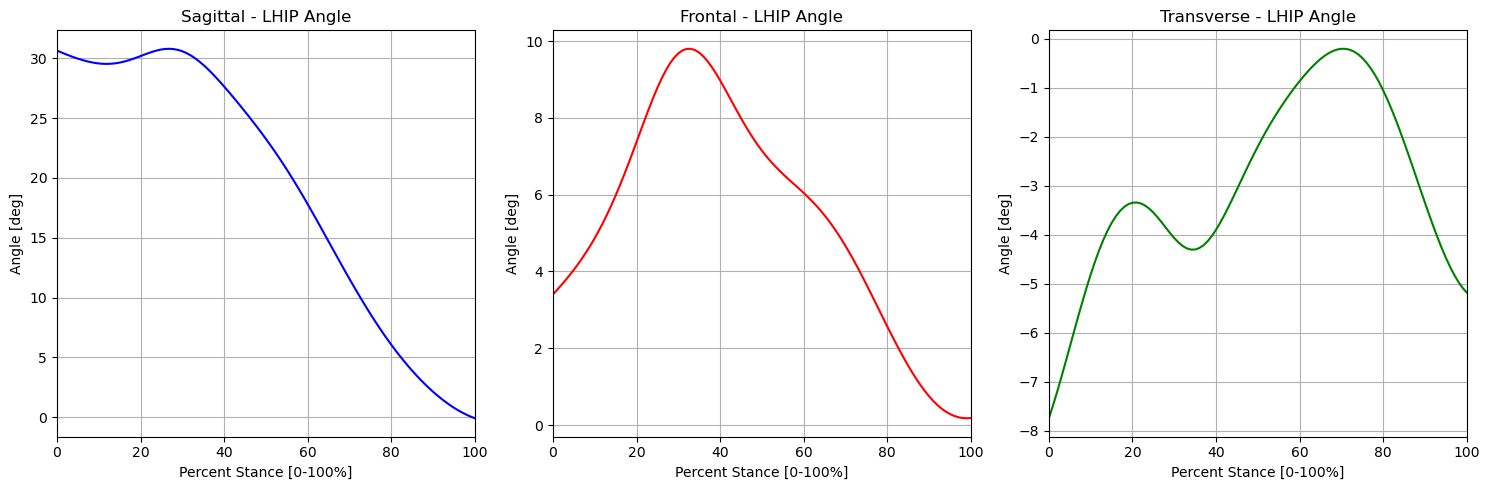

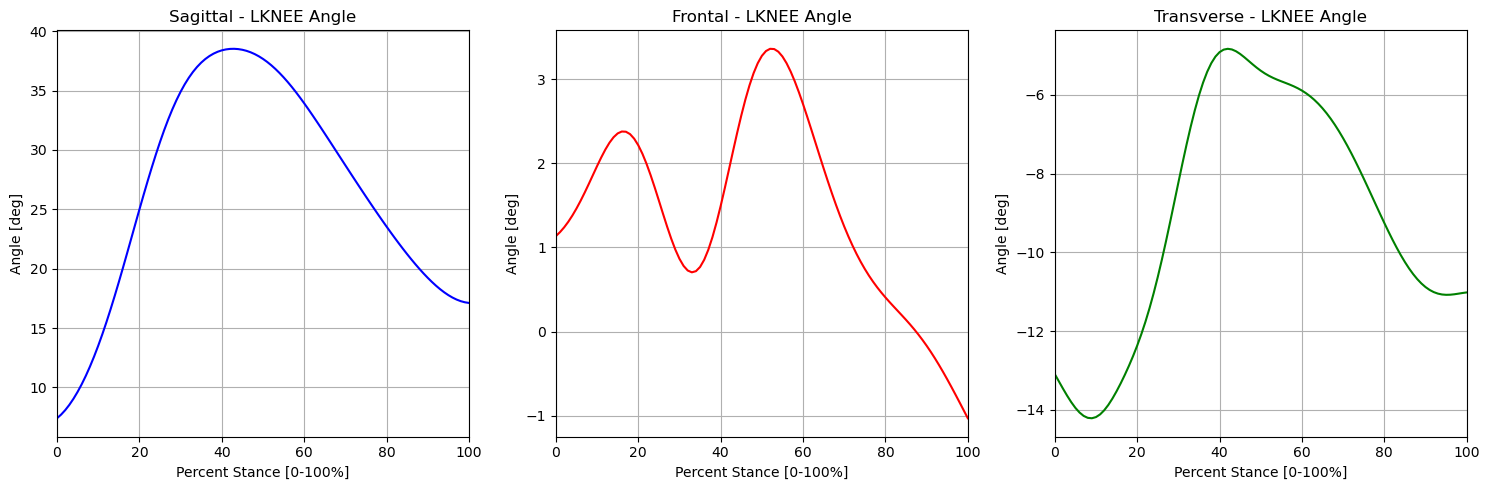

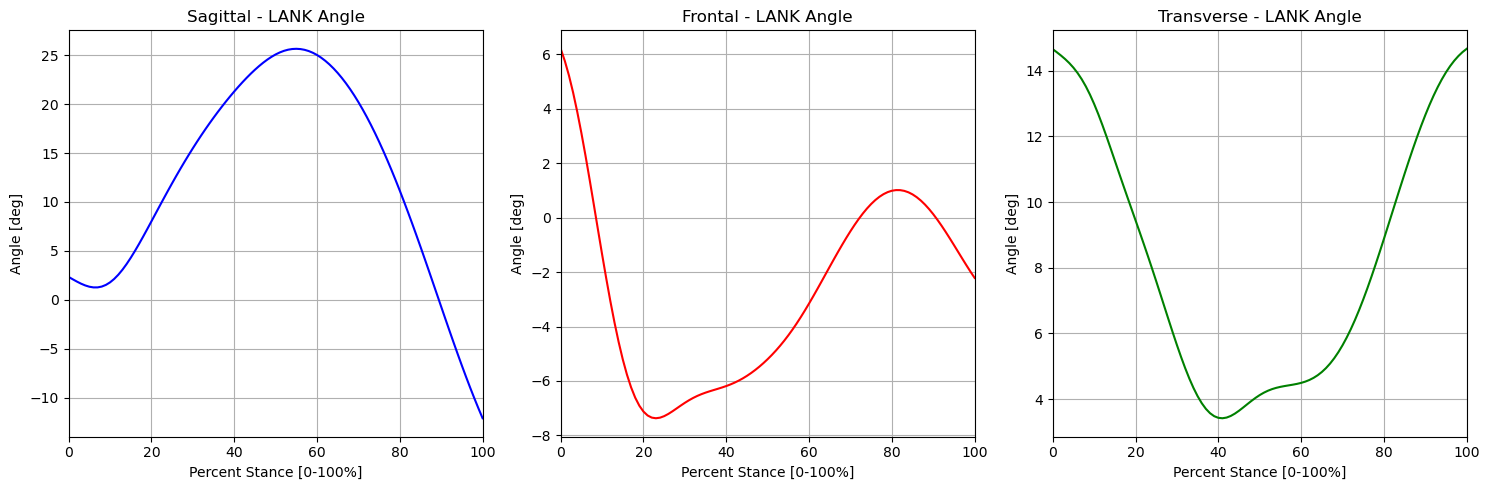

In [4]:
# Function for plotting the signals
def plot_line(signal, indices, title, xaxis='', yaxis='', color=''):
    """Creates a plot of a signal with specified properties. Takes several arguments to customize the appearance of the plot:
            signal: The signal data to be plotted.
            indices: The x-axis values (indices) corresponding to the signal data.
            title: The title of the plot.
            xaxis: The label for the x-axis.
            yaxis: The label for the y-axis.
            color: The color of the plot line."""
    # create figure and set axes
    plt.title(title)
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    # plot signal
    plt.plot(indices, signal, color=color)
    plt.xlim(0, 100)  # Set x-axis limit
    plt.grid(True)

    
# Plot the mean signals from the DataFrame
for index, row in kinematics.iterrows():
    """ index represents the index of the current row in the kinematics DataFrame.
        row contains the data for the current row, including the file name and signal values.
        kinematics.iterrows() is used to iterate over the rows of the DataFrame. 
        """
    ind = list(range(0, 101))  # ind: represent the x-axis values (indices) for the plot.
    xax = 'Percent Stance [0-100%]'  # x-axis label
    yax = 'Angle [deg]'              # y-axis label
    plt.figure(figsize=(15, 5))  # Adjust figure size as needed
    plt.subplot(131)
    plot_line(row['Z'], ind, f'Sagittal - {row["File"]}', xaxis=xax, yaxis=yax, color='blue')
    plt.subplot(132)
    plot_line(row['X'], ind, f'Frontal - {row["File"]}', xaxis=xax, yaxis=yax, color='red')  
    plt.subplot(133)
    plot_line(row['Y'], ind, f'Transverse - {row["File"]}', xaxis=xax, yaxis=yax, color='green')
    plt.tight_layout()  # Improve subplot spacing
    plt.show()

## Plot Vertical GRF with Peak Value

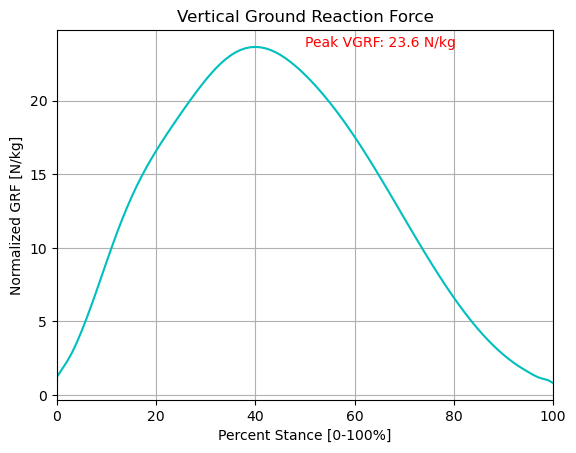

In [5]:
# Plot the Y signal from GRF
for index, row in GRF.iterrows():
    ind = list(range(0, 101))
    plot_line(row['Y'], ind, "Vertical Ground Reaction Force",'Percent Stance [0-100%]','Normalized GRF [N/kg]','c')
    
    # Calculate Peak VGRF
    vgrf = row['Y']
    max_vgrf = round(max(vgrf), 1)
    
    # Add label with peak value to the plot
    plt.text(50, max_vgrf + 0.05, f"Peak VGRF: {max_vgrf} N/kg", color='red')
    plt.show()

## First attempt at performing the task

This code was written less efficiently and not utilizing loops to cycle through all the data.

### Manually performing the task with dataset

In [6]:
#Extract ankle data
ankle = all_data.iloc[4::,1:121]
#ankle

GRF = all_data.iloc[4::,122:242]
#GRF

hip = all_data.iloc[4::,243:363]
#hip

knee = all_data.iloc[4::,364:484]
#knee


In [7]:
#Extract only x columns from ankle data
x_ankle = ankle.iloc[0::,0::3]
#x_ankle
y_ankle = ankle.iloc[0::,1::3] #extract y columns
z_ankle = ankle.iloc[0::,2::3] #extract z columns

#extract only y columns from GRF data
y_GRF = GRF.iloc[0::,1::3]
#y_GRF

#Extract only x columns from hip data
x_hip = hip.iloc[0::,0::3]
#x_hip
y_hip = hip.iloc[0::,1::3] #extract y columns
z_hip = hip.iloc[0::,2::3] #extract z columns

#Extract only x columns from knee data
x_knee = knee.iloc[0::,0::3]
#x_knee
y_knee = knee.iloc[0::,1::3] #extract y columns
z_knee = knee.iloc[0::,2::3] #extract z columns



In [8]:
#Take the average of the x values of each column in ankle data
x_ankle = x_ankle.astype("float") #change all values to float
x_ankle['X Ankle Average'] = x_ankle.mean(axis=1) #this creates a new column with all the average values in that column
#y values
y_ankle = y_ankle.astype("float")
y_ankle['Y Ankle Average'] = y_ankle.mean(axis=1)
#z values
z_ankle = z_ankle.astype("float")
z_ankle['Z Ankle Average'] = z_ankle.mean(axis=1)

#Take the average of the y values of each column of GRF
y_GRF = y_GRF.astype("float")
y_GRF['Average Vertical GRF'] = y_GRF.mean(axis=1)
#y_GRF

#Take the average of the x values of each column in hip data
x_hip = x_hip.astype("float")
x_hip['X Hip Average'] = x_hip.mean(axis=1)
#x_hip
#y values
y_hip = y_hip.astype("float")
y_hip['Y Hip Average'] = y_hip.mean(axis=1)
#z values
z_hip = z_hip.astype("float")
z_hip['Z Hip Average'] = z_hip.mean(axis=1)

#Take the average of the x values of each column in knee data
x_knee = x_knee.astype("float")
x_knee['X Knee Average'] = x_knee.mean(axis=1)
#y values
y_knee = y_knee.astype("float")
y_knee['Y Knee Average'] = y_knee.mean(axis=1)
#z values
z_knee = z_knee.astype("float")
z_knee['Z Knee Average'] = z_knee.mean(axis=1)


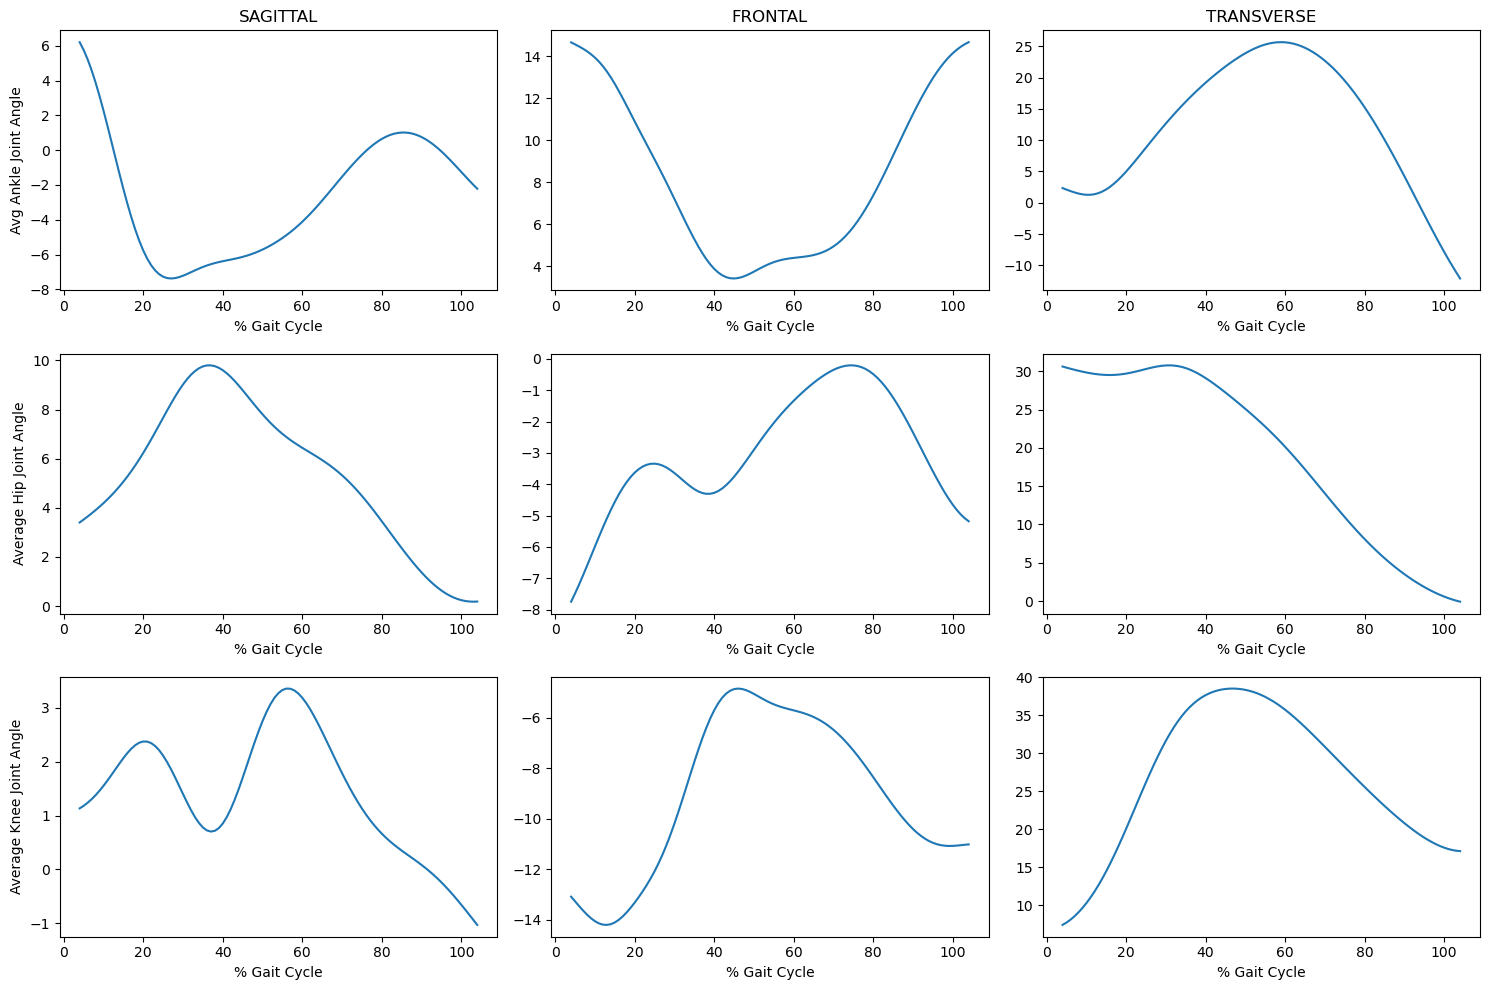

In [9]:
# #Create subplots
fig, axs = plt.subplots(3,3, figsize=(15,10))

# Plotting sagittal plane for ankle, hip, and knee
axs[0,0].plot(x_ankle.index, x_ankle['X Ankle Average'], label='X Ankle Average')
axs[0,0].set_title('SAGITTAL')
axs[0,0].set_xlabel('% Gait Cycle')
axs[0,0].set_ylabel('Avg Ankle Joint Angle')


axs[1,0].plot(x_hip.index, x_hip['X Hip Average'], label='X Hip Average')
axs[1,0].set_xlabel('% Gait Cycle')
axs[1,0].set_ylabel('Average Hip Joint Angle')


axs[2,0].plot(x_knee.index, x_knee['X Knee Average'], label='X Knee Average')
axs[2,0].set_xlabel('% Gait Cycle')
axs[2,0].set_ylabel('Average Knee Joint Angle')


# Plotting frontal plane for ankle, hip, and knee
axs[0,1].plot(y_ankle.index, y_ankle['Y Ankle Average'], label='Y Ankle Average')
axs[0,1].set_title('FRONTAL')
axs[0,1].set_xlabel('% Gait Cycle')
#axs[0,1].set_ylabel('Avg Ankle Joint Angle')


axs[1,1].plot(y_hip.index, y_hip['Y Hip Average'], label='Y Hip Average')
axs[1,1].set_xlabel('% Gait Cycle')
#axs[1,1].set_ylabel('Avg Hip Joint Angle')

axs[2,1].plot(y_knee.index, y_knee['Y Knee Average'], label='Y Knee Average')
axs[2,1].set_xlabel('% Gait Cycle')
#axs[2,1].set_ylabel('Avg Ankle Joint Angle')


# Plotting transverse plane for ankle, hip, and knee
axs[0,2].plot(z_ankle.index, z_ankle['Z Ankle Average'], label='Z Ankle Average')
axs[0,2].set_title('TRANSVERSE')
axs[0,2].set_xlabel('% Gait Cycle')
#axs[0,2].set_ylabel('Avg Ankle Joint Angle')


axs[1,2].plot(z_hip.index, z_hip['Z Hip Average'], label='Z Hip Average')
axs[1,2].set_xlabel('% Gait Cycle')
#axs[1,2].set_ylabel('Avg Hip Joint Angle')

axs[2,2].plot(z_knee.index, z_knee['Z Knee Average'], label='Z Knee Average')
axs[2,2].set_xlabel('% Gait Cycle')
#axs[2,2].set_ylabel('Avg Knee Joint Angle')

plt.tight_layout()


Text(0, 0.5, 'Force (N)')

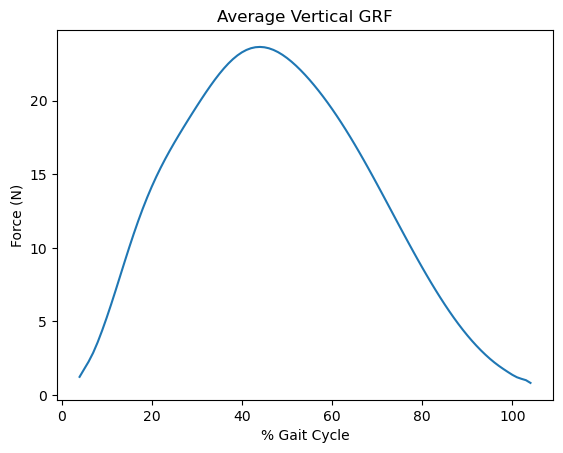

In [10]:
plt.plot(y_GRF['Average Vertical GRF'])
plt.title('Average Vertical GRF')
plt.xlabel('% Gait Cycle')
plt.ylabel('Force (N)')